In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [27]:
df = pd.read_csv('dataset/modis_flood_features_cleaned_v1.1.csv')

In [28]:
df.head()

,date,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,2003-12-10,120.478677,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,0.0,0.116685,270.000000,0.031990,1.042098,0
1,2003-12-10,120.480923,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,1.0,0.839713,236.480074,0.031990,1.042098,0
2,2003-12-10,120.478677,-6.493697,0.0,1.0,9.645125,28.935376,6190.93062,0.028399,17.0,0.0,0.466730,270.000000,0.031990,1.042098,0
3,2003-12-10,120.480923,-6.493697,1.0,0.0,9.645125,28.935376,6190.93062,0.028399,17.0,4.0,0.939179,240.413746,0.021235,0.258796,1
4,2003-12-10,120.478677,-6.491451,0.0,1.0,9.645125,28.935376,6190.93062,-0.002506,17.0,0.0,0.583403,270.000000,0.031990,1.042098,0


In [29]:
df.shape

(1472156, 16)

In [30]:
df.isnull().sum()

date              0
lon               0
lat               0
flooded           0
jrc_perm_water    0
precip_1d         0
precip_3d         0
NDVI              0
NDWI              0
landcover         0
elevation         0
slope             0
aspect            0
upstream_area     0
TWI               0
target            0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472156 entries, 0 to 1472155
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1472156 non-null  object 
 1   lon             1472156 non-null  float64
 2   lat             1472156 non-null  float64
 3   flooded         1472156 non-null  float64
 4   jrc_perm_water  1472156 non-null  float64
 5   precip_1d       1472156 non-null  float64
 6   precip_3d       1472156 non-null  float64
 7   NDVI            1472156 non-null  float64
 8   NDWI            1472156 non-null  float64
 9   landcover       1472156 non-null  float64
 10  elevation       1472156 non-null  float64
 11  slope           1472156 non-null  float64
 12  aspect          1472156 non-null  float64
 13  upstream_area   1472156 non-null  float64
 14  TWI             1472156 non-null  float64
 15  target          1472156 non-null  int64  
dtypes: float64(14), int64(1), object(1)


## Preprocessing

In [32]:
# Memeriksa statistik deskriptif dari dataset untuk kolom numerik
numerical_stats = df.describe()
numerical_styled = numerical_stats.style.background_gradient(cmap='Blues')
print("Statistik Deskriptif Kolom Numerik Dataset: ")
display(numerical_styled)

Statistik Deskriptif Kolom Numerik Dataset: 


,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
count,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000,1472156.000000
mean,120.173879,-4.000813,0.082184,0.070440,11.561183,42.018585,6190.930620,0.253362,10.573526,183.208832,1.659294,160.494576,11.439528,1.675676,0.033774
std,0.508120,1.043846,0.274644,0.255886,14.226386,31.130805,1927.959301,0.109585,4.040451,359.793364,2.254702,104.616852,125.594954,2.771383,0.180646
min,119.353537,-6.495942,0.000000,0.000000,0.000000,0.000000,-2000.000000,-0.385959,1.000000,-5.000000,0.000000,0.000000,0.008494,-4.436093,0.000000
25%,119.825153,-4.838551,0.000000,0.000000,0.000000,20.845348,5168.000000,0.191034,8.000000,14.000000,0.348707,71.614262,0.012785,-0.294873,0.000000
50%,120.137317,-4.048033,0.000000,0.000000,7.655426,38.857990,6628.000000,0.257864,12.000000,38.000000,0.844249,159.361447,0.031990,1.042098,0.000000
75%,120.346176,-2.895944,0.000000,0.000000,19.391876,58.867994,7669.000000,0.327032,14.000000,148.000000,2.093728,249.522113,0.226287,3.124817,0.000000
max,121.792463,-1.887585,1.000000,1.000000,107.288399,220.219070,10000.000000,0.608670,17.000000,3278.000000,48.091248,359.348113,5128.527832,14.996599,1.000000


In [35]:
all_numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

cols_to_exclude = {'lon', 'lat', 'flooded', 'jrc_perm_water', 'target'}
numerical_cols = [col for col in all_numerical_cols if col not in cols_to_exclude]

print("Kolom Numerik:", all_numerical_cols)
print("Kolom Numerik untuk Scaling:", numerical_cols)
print("Kolom Kategorikal:", categorical_cols)

Kolom Numerik: ['lon', 'lat', 'flooded', 'jrc_perm_water', 'precip_1d', 'precip_3d', 'NDVI', 'NDWI', 'landcover', 'elevation', 'slope', 'aspect', 'upstream_area', 'TWI', 'target']
Kolom Numerik untuk Scaling: ['precip_1d', 'precip_3d', 'NDVI', 'NDWI', 'landcover', 'elevation', 'slope', 'aspect', 'upstream_area', 'TWI']
Kolom Kategorikal: ['date']


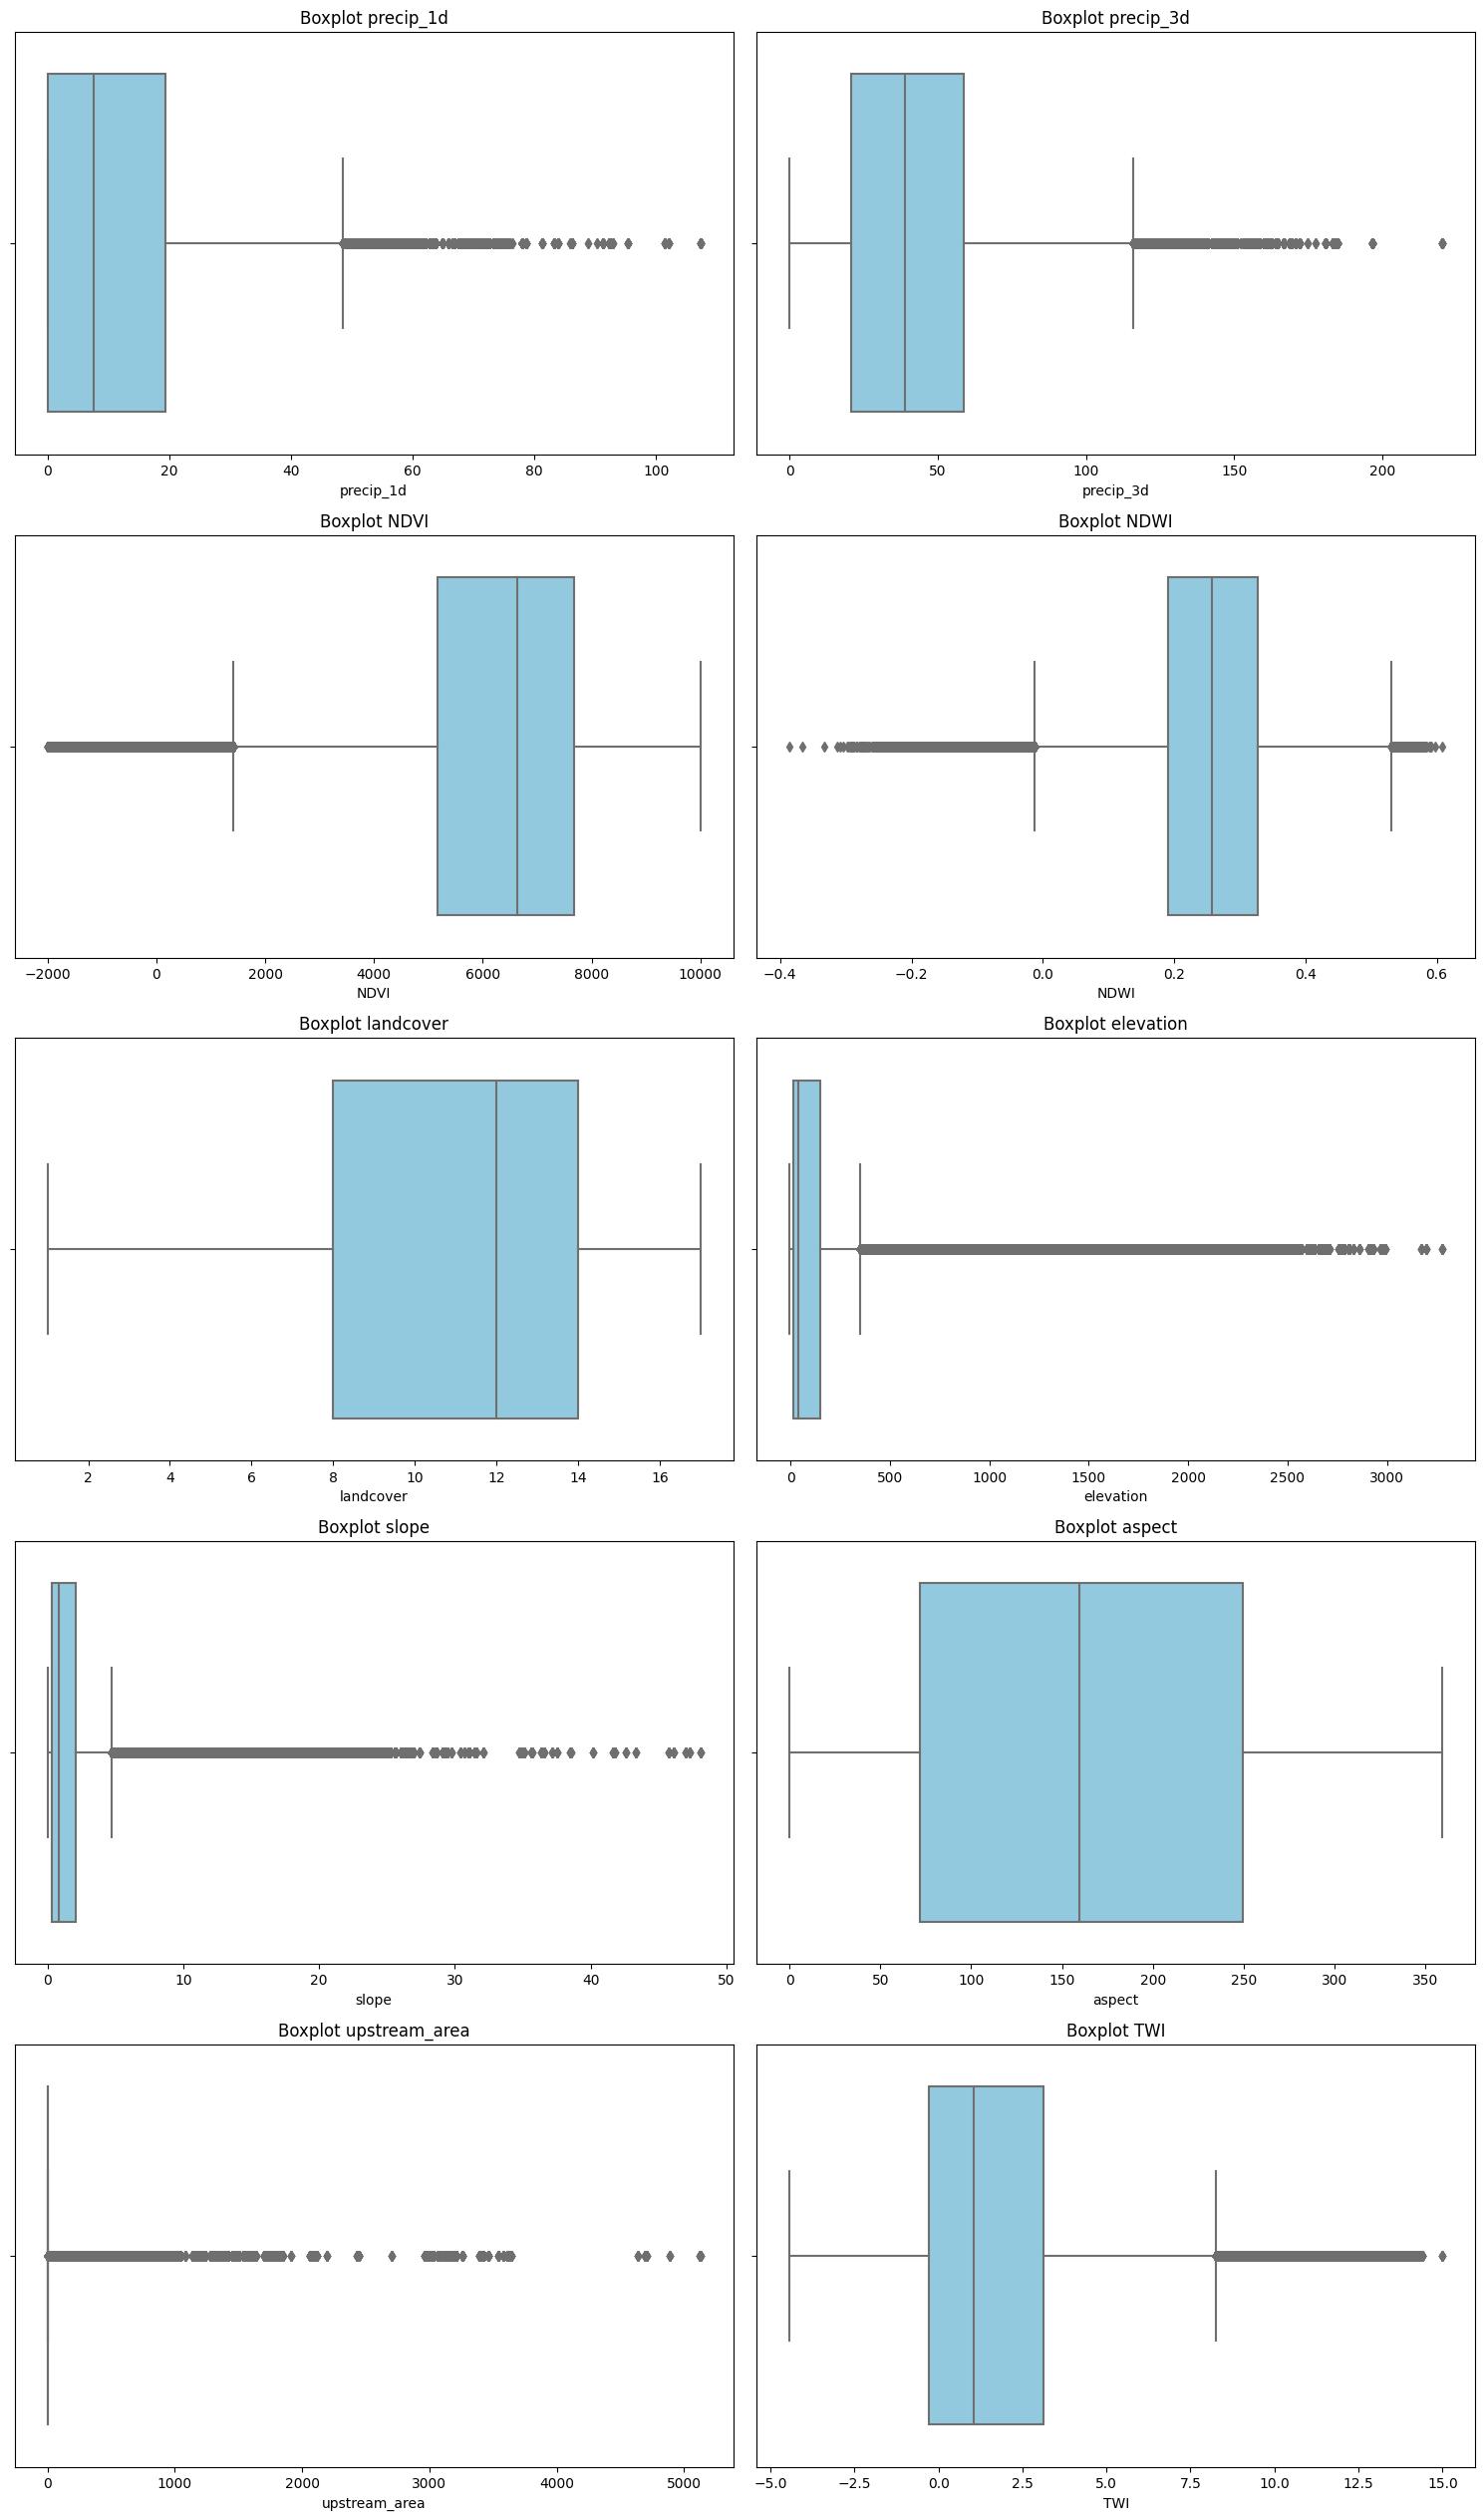

In [36]:
# Mengatur ukuran grid untuk visualisasi
n_cols = 2
n_row = len(numerical_cols) // n_cols + 1

# Menampilkan boxpolot untuk kolom numerik
plt.figure(figsize=(15, 5 * n_row))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_row, n_cols, i + 1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot {col}')

plt.tight_layout()
plt.show()

In [37]:
corr_matrix = df[all_numerical_cols].corr()
corr_matrix = corr_matrix["target"].sort_values(ascending=False) 

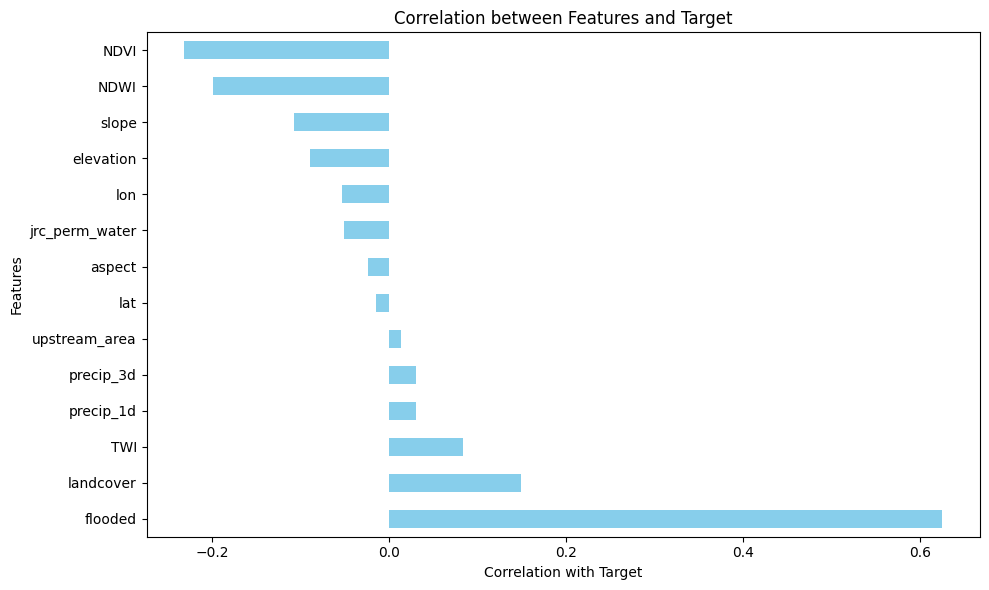

In [38]:
# Plot bar chart horizontal
plt.figure(figsize=(10, 6))
corr_matrix.drop('target').plot(kind='barh', color='skyblue') 

# Menambahkan label dan judul
plt.xlabel('Correlation with Target')
plt.ylabel('Features')
plt.title('Correlation between Features and Target')

# Tampilkan plot
plt.tight_layout()
plt.show()

## Standarization (z-score)

In [39]:
standard_scaler = StandardScaler()

In [40]:
# Membuat Salinan Dataset sebelum Melakukan Standarisasi
df_ori = df.copy()

In [41]:
# Menerapkan standarisasi pada kolom numerik
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])
print("Data setelah standarisasi:")
df[numerical_cols].head()

Data setelah standarisasi:


,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI
0,-0.134683,-0.420266,4.717397e-16,-2.781470,1.590534,-0.509206,-0.684174,1.046729,-0.090828,-0.228615
1,-0.134683,-0.420266,4.717397e-16,-2.781470,1.590534,-0.506426,-0.363499,0.726322,-0.090828,-0.228615
2,-0.134683,-0.420266,4.717397e-16,-2.052863,1.590534,-0.509206,-0.528923,1.046729,-0.090828,-0.228615
3,-0.134683,-0.420266,4.717397e-16,-2.052863,1.590534,-0.498088,-0.319384,0.763923,-0.090914,-0.511254
4,-0.134683,-0.420266,4.717397e-16,-2.334877,1.590534,-0.509206,-0.477177,1.046729,-0.090828,-0.228615


### KNN

In [15]:
df

,date,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,2003-12-10,120.478677,-6.495942,3.341839,3.632708,-0.134683,-0.420266,4.717397e-16,-2.781470,1.590534,-0.509206,-0.684174,1.046729,-0.090828,-0.228615,0
1,2003-12-10,120.480923,-6.495942,3.341839,3.632708,-0.134683,-0.420266,4.717397e-16,-2.781470,1.590534,-0.506426,-0.363499,0.726322,-0.090828,-0.228615,0
2,2003-12-10,120.478677,-6.493697,-0.299236,3.632708,-0.134683,-0.420266,4.717397e-16,-2.052863,1.590534,-0.509206,-0.528923,1.046729,-0.090828,-0.228615,0
3,2003-12-10,120.480923,-6.493697,3.341839,-0.275277,-0.134683,-0.420266,4.717397e-16,-2.052863,1.590534,-0.498088,-0.319384,0.763923,-0.090914,-0.511254,1
4,2003-12-10,120.478677,-6.491451,-0.299236,3.632708,-0.134683,-0.420266,4.717397e-16,-2.334877,1.590534,-0.509206,-0.477177,1.046729,-0.090828,-0.228615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472151,2015-02-05,119.993587,-2.033561,-0.299236,-0.275277,-0.812658,-0.421701,6.014493e-01,-0.965324,-2.121924,4.557593,5.002444,0.239625,-0.090981,-1.646136,0
1472152,2015-02-05,120.045240,-2.033561,-0.299236,-0.275277,-0.812658,-0.803967,7.868786e-01,-0.701041,-2.121924,4.552034,1.174102,1.847995,0.008392,1.239719,0
1472153,2015-02-05,120.067698,-2.033561,-0.299236,-0.275277,-0.812658,-0.790229,8.231864e-01,-0.383186,-2.121924,4.916132,0.797126,-0.544199,-0.090998,-1.229888,0
1472154,2015-02-05,120.072190,-2.033561,-0.299236,-0.275277,-0.812658,-0.790229,8.231864e-01,-0.457386,-2.121924,4.921691,1.743559,0.254595,-0.078448,0.400530,0


In [16]:
df['target'].value_counts()

target
0    1422436
1      49720
Name: count, dtype: int64

In [17]:
df.columns

Index(['date', 'lon', 'lat', 'flooded', 'jrc_perm_water', 'precip_1d',
       'precip_3d', 'NDVI', 'NDWI', 'landcover', 'elevation', 'slope',
       'aspect', 'upstream_area', 'TWI', 'target'],
      dtype='object')

In [42]:
# Memisahkan fitur dan target
X = df.iloc[:, 5:-1].values  # Features
y = df.iloc[:, -1].values  # Target

In [43]:
# Splitting data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [20]:
# Menggunakan SMOTE untuk mengatasi ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [21]:
# Fit model dengan k tertentu
k_range = range(2, 11)

# Simpan hasil evaluasi untuk tiap nilai k
results = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote, y_train_smote)
    
    y_pred = knn.predict(X_test)
    y_proba = knn.predict_proba(X_test)[:, 1]

    # Hitung semua metrik
    acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred) * 100
    rec = recall_score(y_test, y_pred) * 100
    auc = roc_auc_score(y_test, y_proba)

    results.append({
        'k': k,
        'Accuracy': round(acc, 5),
        'F1': round(f1, 5),
        'Precision': round(prec, 5),
        'Recall': round(rec, 5),
        'AUC': round(auc, 3)
    })

# Buat dataframe dari hasil
results_df = pd.DataFrame(results)
results_df

,k,Accuracy,F1,Precision,Recall,AUC
0,2,99.99966,99.99497,100.0,99.98994,1.0
1,3,99.99966,99.99497,100.0,99.98994,1.0
2,4,99.99966,99.99497,100.0,99.98994,1.0
3,5,99.99966,99.99497,100.0,99.98994,1.0
4,6,99.99966,99.99497,100.0,99.98994,1.0
5,7,99.99966,99.99497,100.0,99.98994,1.0
6,8,99.99966,99.99497,100.0,99.98994,1.0
7,9,99.99966,99.99497,100.0,99.98994,1.0
8,10,99.99966,99.99497,100.0,99.98994,1.0


## SVM

In [44]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [45]:
# Evaluasi model pada data test
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[284211    277]
 [  8905   1039]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    284488
           1       0.79      0.10      0.18      9944

    accuracy                           0.97    294432
   macro avg       0.88      0.55      0.58    294432
weighted avg       0.96      0.97      0.96    294432

